## Julia. Les premiers pas, cinquième partie

In [2]:
using Dates

let # portée locale
    d = Dates.now()
    println("Daniel Hagnoul $d\n")
end

Daniel Hagnoul 2020-10-27T12:50:51.537



### CSV

Lien vers le fichier à copier dans votre répertoire de travail : https://gist.github.com/netj/8836201#file-iris-csv.

Il faut charger le paquet CSV : Pkg.add("CSV")


In [3]:
using CSV, DataFrames

iris = CSV.read("iris.csv", normalizenames = true)

let
    println("typeof(iris) = $(typeof(iris))\n")
    println("size(iris) = $(size(iris))\n")

    println("noms des colonnes = $(names(iris))\n")

    println("iris, les 10 premières lignes = $(first(iris, 10))\n")
end

typeof(iris) = DataFrame

size(iris) = (150, 5)

noms des colonnes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "variety"]

iris, les 10 premières lignes = 10×5 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │ variety │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ String  │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼─────────┤
│ 1   │ 5.1          │ 3.5         │ 1.4          │ 0.2         │ Setosa  │
│ 2   │ 4.9          │ 3.0         │ 1.4          │ 0.2         │ Setosa  │
│ 3   │ 4.7          │ 3.2         │ 1.3          │ 0.2         │ Setosa  │
│ 4   │ 4.6          │ 3.1         │ 1.5          │ 0.2         │ Setosa  │
│ 5   │ 5.0          │ 3.6         │ 1.4          │ 0.2         │ Setosa  │
│ 6   │ 5.4          │ 3.9         │ 1.7          │ 0.4         │ Setosa  │
│ 7   │ 4.6          │ 3.4         │ 1.4          │ 0.3         │ Setosa  │
│ 8   │ 5.0          │ 3.4         │ 1.5         

In [4]:
let
    println("décrit iris = $(describe(iris))")
end

décrit iris = 5×8 DataFrame
│ Row │ variable     │ mean    │ min    │ median │ max       │ nunique │ nmissing │ eltype   │
│     │ Symbol       │ Union…  │ Any    │ Union… │ Any       │ Union…  │ Nothing  │ DataType │
├─────┼──────────────┼─────────┼────────┼────────┼───────────┼─────────┼──────────┼──────────┤
│ 1   │ sepal_length │ 5.84333 │ 4.3    │ 5.8    │ 7.9       │         │          │ Float64  │
│ 2   │ sepal_width  │ 3.05733 │ 2.0    │ 3.0    │ 4.4       │         │          │ Float64  │
│ 3   │ petal_length │ 3.758   │ 1.0    │ 4.35   │ 6.9       │         │          │ Float64  │
│ 4   │ petal_width  │ 1.19933 │ 0.1    │ 1.3    │ 2.5       │         │          │ Float64  │
│ 5   │ variety      │         │ Setosa │        │ Virginica │ 3       │          │ String   │


Il faut charger le paquet Query : Pkg.add("Query")

In [5]:
using Query

let
    tn = iris |> @select(:sepal_length, :petal_width) |> collect

    println("tn, les 3 premières valeurs contenue dans le namedtuple = $(tn[1:3])\n")

    println("Les 7 première valeurs contenues dans tn : ")

    for item in tn[1:7]
        println(item)
    end
end

tn, les 3 premières valeurs contenue dans le namedtuple = NamedTuple{(:sepal_length, :petal_width),Tuple{Float64,Float64}}[(sepal_length = 5.1, petal_width = 0.2), (sepal_length = 4.9, petal_width = 0.2), (sepal_length = 4.7, petal_width = 0.2)]

Les 7 première valeurs contenues dans tn : 
(sepal_length = 5.1, petal_width = 0.2)
(sepal_length = 4.9, petal_width = 0.2)
(sepal_length = 4.7, petal_width = 0.2)
(sepal_length = 4.6, petal_width = 0.2)
(sepal_length = 5.0, petal_width = 0.2)
(sepal_length = 5.4, petal_width = 0.4)
(sepal_length = 4.6, petal_width = 0.3)


In [6]:
let
    df = iris |> @filter(_.variety == "Virginica") |> DataFrame

    println("df, les 5 premières lignes = $(first(df, 5))\n")
end

df, les 5 premières lignes = 5×5 DataFrame
│ Row │ sepal_length │ sepal_width │ petal_length │ petal_width │ variety   │
│     │ Float64      │ Float64     │ Float64      │ Float64     │ String    │
├─────┼──────────────┼─────────────┼──────────────┼─────────────┼───────────┤
│ 1   │ 6.3          │ 3.3         │ 6.0          │ 2.5         │ Virginica │
│ 2   │ 5.8          │ 2.7         │ 5.1          │ 1.9         │ Virginica │
│ 3   │ 7.1          │ 3.0         │ 5.9          │ 2.1         │ Virginica │
│ 4   │ 6.3          │ 2.9         │ 5.6          │ 1.8         │ Virginica │
│ 5   │ 6.5          │ 3.0         │ 5.8          │ 2.2         │ Virginica │



In [7]:

df_virginica = iris |> @filter(_.variety == "Virginica") |> DataFrame
df = df_virginica |> @select(:sepal_length, :petal_width) |> DataFrame

println("$(first(df, 10))")

10×2 DataFrame
│ Row │ sepal_length │ petal_width │
│     │ Float64      │ Float64     │
├─────┼──────────────┼─────────────┤
│ 1   │ 6.3          │ 2.5         │
│ 2   │ 5.8          │ 1.9         │
│ 3   │ 7.1          │ 2.1         │
│ 4   │ 6.3          │ 1.8         │
│ 5   │ 6.5          │ 2.2         │
│ 6   │ 7.6          │ 2.1         │
│ 7   │ 4.9          │ 1.7         │
│ 8   │ 7.3          │ 1.8         │
│ 9   │ 6.7          │ 1.8         │
│ 10  │ 7.2          │ 2.5         │


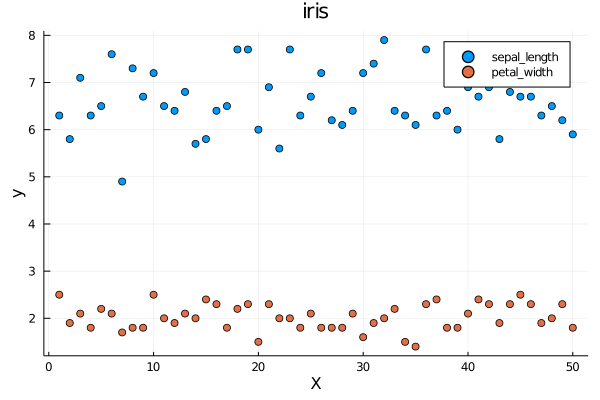

In [8]:
using Plots

let
    p = scatter(1:size(df)[1], [df.sepal_length df.petal_width], title="iris", label=["sepal_length" "petal_width"], lw=2)

    xlabel!(p, "X")
    ylabel!(p, "y")
end

[Licence Creative Commons Attribution 2.0 Belgique] (https://creativecommons.org/licenses/by/2.0/be/)